In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

In [28]:
try:
    df = pd.read_csv("wine-clustering.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [32]:
features = (df - df.mean(axis=0)) / df.std(axis=0)
features

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [33]:
def pca_manual(X, n_components=2):
    cov_matrix = np.cov(X, rowvar=False)
    values, vectors = np.linalg.eig(cov_matrix)
    
    sorted_index = np.argsort(values)[::-1]
    sorted_vectors = vectors[:, sorted_index]
    
    subset_vectors = sorted_vectors[:, :n_components]
    X_reduced = np.dot(X, subset_vectors)
    return X_reduced, sorted_vectors

In [34]:
X_pca, sorted_vectors = pca_manual(features, 2)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [35]:
df_pca.head()

,PC1,PC2
0,-3.307421,1.439402
1,-2.203250,-0.332455
2,-2.509661,1.028251
3,-3.746497,2.748618
4,-1.006070,0.867384


<Axes: xlabel='PC1', ylabel='PC2'>

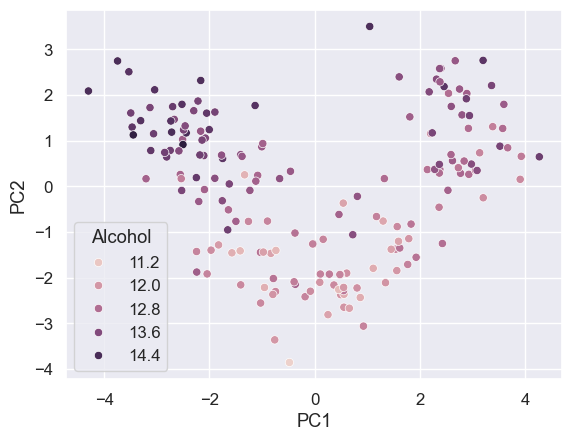

In [36]:
sns.scatterplot(df_pca, x='PC1', y='PC2', hue=df['Alcohol'])

In [37]:
def init(X, k, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    idx_acak = np.random.randint(0, n_samples)
    centroids = [X[idx_acak]]
    
    for i in range(k - 1):
        dists_sq = np.min(np.linalg.norm(X[:, None] - np.array(centroids), axis=2) ** 2, axis=1)
        probs = dists_sq / np.sum(dists_sq)
        next_centroids = X[np.random.choice(len(X), p=probs)]
        centroids.append(next_centroids)
    return np.array(centroids)

In [38]:
def kmeans_plusplus(df, k, max_iter=1000, tol=1e-4):
    X = df.values
    centroids = init(X, k)
    
    for i in range(max_iter):
        euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(euclid, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

In [39]:
def calc_wcss(df, k):
    X = df.to_numpy()
    clusters, centroids = kmeans_plusplus(df, k)
    euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
    min_jarak = np.min(euclid, axis=1)
    wcss = np.sum(min_jarak ** 2)
    return wcss

In [40]:
calc_wcss(df_pca, 3)

np.float64(258.0514628818044)

In [41]:
def elbow_method(df, maxk=10):
    wcss_values = []
    for k in range(1, maxk + 1):
        wcss = calc_wcss(df, k)
        wcss_values.append(wcss)
        
    plt.plot(range(1, maxk + 1), wcss_values, marker='o', linestyle='--')
    plt.title("Elbow Method")
    plt.ylabel("Nilai Error WCSS")
    plt.ylabel("Jumlah K")
    plt.show()

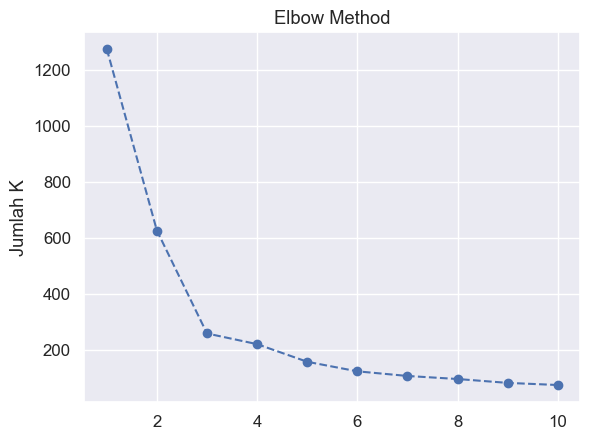

In [42]:
elbow_method(df_pca, 10)

In [43]:
def calc_sscore(df, k):
    clusters, centroids = kmeans_plusplus(df, k)
    sscore = []
    
    for i in range(len(df)):
        ci = clusters[i]
        
        samecp = df[clusters == ci].to_numpy()
        ai = np.mean(np.linalg.norm(samecp - df.iloc[i].to_numpy(), axis=1))
        
        distance_to_otherc = []
        for j in range(k):
            if j != ci:
                othercp = df[clusters == j].to_numpy()
                bi_temp = np.mean(np.linalg.norm(othercp - df.iloc[i].to_numpy(), axis=1))
                distance_to_otherc.append(bi_temp)
        
        bi = min(distance_to_otherc)
        
        sscore_i = (bi - ai) / max(ai, bi)
        sscore.append(sscore_i)
        
    avg_sscore = np.mean(sscore)
    
    return avg_sscore

In [44]:
def silhouette_score(df, maxk=10):
    sscore_values = []
    for k in range(2, maxk + 1):
        sscore = calc_sscore(df, k)
        sscore_values.append(sscore)
        
    plt.plot(range(2, maxk + 1), sscore_values, marker='o', linestyle='--')
    plt.title("Silhouette Score")
    plt.ylabel("Nilai Akurasi Silhouette")
    plt.ylabel("Jumlah K")
    plt.show()

In [45]:
calc_sscore(df_pca, 3)

np.float64(0.5683353395253764)

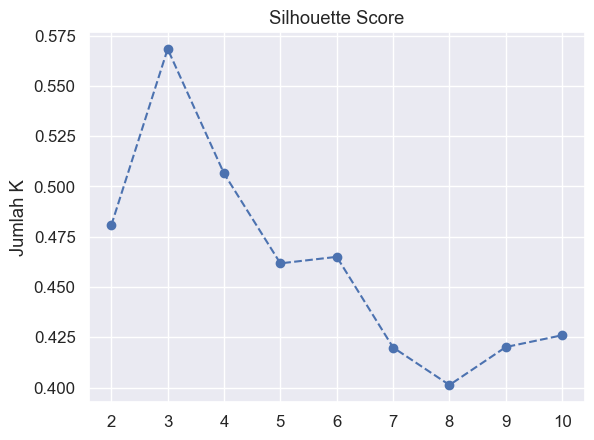

In [46]:
silhouette_score(df_pca, 10)

In [47]:
clusters, centroids = kmeans_plusplus(df_pca, k=3)
df_pca['clusters'] = clusters
df_pca.head()

,PC1,PC2,clusters
0,-3.307421,1.439402,2
1,-2.203250,-0.332455,2
2,-2.509661,1.028251,2
3,-3.746497,2.748618,2
4,-1.006070,0.867384,2


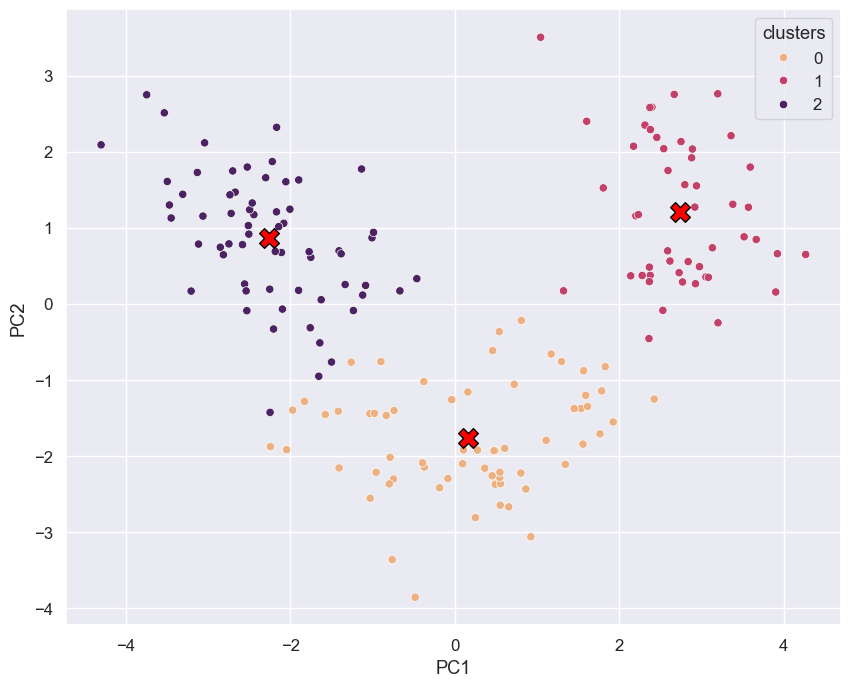

In [48]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='clusters', palette='flare')
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    c='red', marker='X', s=200, 
    label='Centroids', 
    edgecolor='black'
)
plt.show()

In [49]:
df_pca['clusters'].value_counts()

clusters
0    65
2    64
1    49
Name: count, dtype: int64

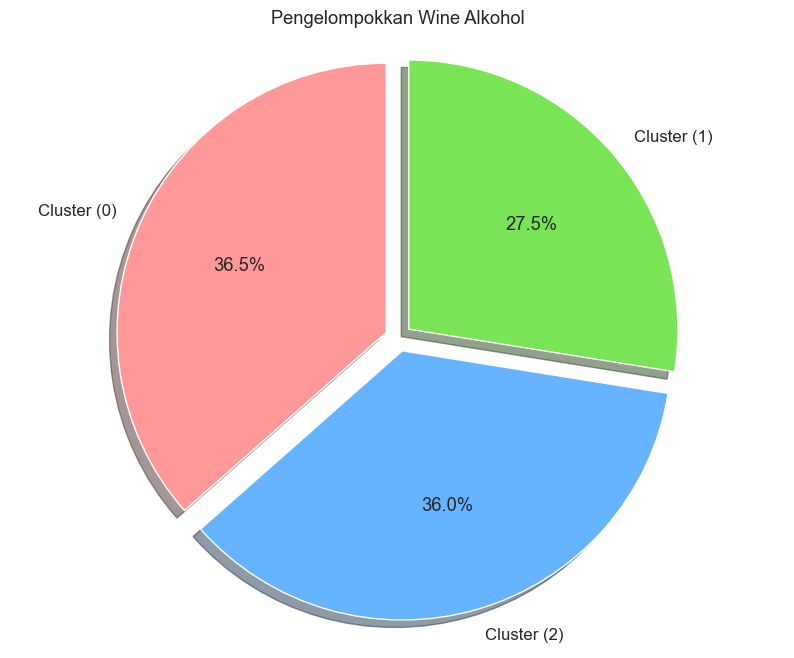

In [50]:
Clusters = df_pca['clusters'].value_counts()

label = ['Cluster (0)', 'Cluster (2)', 'Cluster (1)']

plt.figure(figsize=(10, 8))
plt.pie(Clusters,
        labels=label,
        autopct = '%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff', "#79e456"],
        explode=(0.05, 0.05, 0.05),
        shadow= True)

plt.title("Pengelompokkan Wine Alkohol")
plt.axis('equal')
plt.show()

In [51]:
df['clusters'] = clusters
alkohol_mapping = {0 : 'Memabukkan', 1 : 'Sangat Memabukkan', 2 : 'Sedikit Memabukkan'}
df['Drunkness_Level'] = df['clusters'].map(alkohol_mapping)

In [52]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters,Drunkness_Level
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,Sedikit Memabukkan
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,Sedikit Memabukkan
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,Sedikit Memabukkan
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,Sedikit Memabukkan
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,Sedikit Memabukkan


In [53]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'clusters', 'Drunkness_Level'],
      dtype='object')

In [54]:
df.groupby('clusters').mean(numeric_only=True)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
clusters,,,,,,,,,,,,,
0,12.238308,1.931385,2.219385,19.898462,92.830769,2.204308,1.989231,0.365538,1.587692,2.992615,1.051631,2.769231,506.353846
1,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,13.659219,1.975781,2.463750,17.596875,107.312500,2.859688,3.012656,0.290000,1.921719,5.406250,1.069688,3.157188,1082.562500


In [63]:
import tkinter as tk
from tkinter import *

kolom_fitur = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

std_mean = df[kolom_fitur].mean(axis=0).to_numpy()
std_std = df[kolom_fitur].std(axis=0).to_numpy()

pca_vectors = sorted_vectors[:, 2]
centroids_jarak = centroids

def prediksi():
    alcohol = float(input_alcohol.get())
    malic = float(input_malic.get())
    ash = float(input_ash.get())
    ash_alc = float(input_ash_alc.get())
    magnesium = float(input_magnesium.get())
    tot_phen = float(input_tot_phen.get())
    flavo = float(input_flavo.get())
    nonfl_phen = float(input_nonfl_phen.get())
    proant = float(input_proant.get())
    color = float(input_color.get())
    hue = float(input_hue.get())
    od = float(input_od.get())
    proline = float(input_proline.get())
    
    X_input = np.array([flavo, proline])
    X_scaled = (X_input - std_mean) / std_std
    X_pca = np.dot(X_scaled, pca_vectors)
    jarak = np.linalg.norm(X_pca - centroids_jarak, axis=1)
    cluster_terpilih = np.argmin(jarak)
    if cluster_terpilih == 0:
        teks_hasil = "Memabukkan"
    elif cluster_terpilih == 1:
        teks_hasil = "Sangat Memabukkan"
    else:
        teks_hasil = "Sedikit Memabukkan"
    hasil_predict.config(Text=f"{teks_hasil}")
    

# GUI UTAMA
root = tk.Tk()
root.title("K-Means ++ Clustering")
root.geometry("400x800")
root.config(bg="#838383")

Header = Frame(root, bg="#3C3C3C")
Header.pack(fill=X)
Judul = Label(Header, text="Wine Drunkness Predictor", font=("Arial", 18, "bold"), bg="#3C3C3C", fg="white")
Judul.pack(pady=(10, 5))
Judul = Label(Header, text="K-Means++ Clustering", font=("Arial", 12, "bold"), bg="#3C3C3C", fg="white")
Judul.pack(pady=(0, 20))

Main = Frame(root, bg="#838383")
Main.pack()
Label(Main, text="Alcohol", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_alcohol = Entry(Main, width=50)
input_alcohol.pack()

Label(Main, text="Malic_Acid", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_malic = Entry(Main, width=50)
input_malic.pack()

Label(Main, text="Ash", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_ash = Entry(Main, width=50)
input_ash.pack()

Label(Main, text="Ash_Alc", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_ash_alc = Entry(Main, width=50)
input_ash_alc.pack()

Label(Main, text="Magnesium", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_magnesium = Entry(Main, width=50)
input_magnesium.pack()

Label(Main, text="Total Phenol", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_tot_phen = Entry(Main, width=50)
input_tot_phen.pack()

Label(Main, text="Flavonoid", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_flavo = Entry(Main, width=50)
input_flavo.pack()

Label(Main, text="Nonflavonoid Phenol", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_nonfl_phen = Entry(Main, width=50)
input_nonfl_phen.pack()

Label(Main, text="Proant", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_proant = Entry(Main, width=50)
input_proant.pack()

Label(Main, text="Color Intensity", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_color = Entry(Main, width=50)
input_color.pack()

Label(Main, text="Hue", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_hue = Entry(Main, width=50)
input_hue.pack()

Label(Main, text="OD", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_od = Entry(Main, width=50)
input_od.pack()

Label(Main, text="Proline", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_proline = Entry(Main, width=50)
input_proline.pack()

Hasil = Frame(root, bg='#3C3C3C')
Hasil.pack(fill=X, pady=(10, 0))
btn_predict = Button(Hasil, text="Prediksi Kondisi" ,command=prediksi, bg='white', fg='#3C3C3C', font=('Arial', 10, 'bold'))
btn_predict.pack(padx=30, pady=(10, 0))

Label(Hasil, text="Hasil Prediksi:", font=('Arial', 10), fg='white', bg="#3C3C3C").pack(pady=(10,5))
hasil_predict = Label(Hasil, text="-", fg='white', font=('Arial', 16, 'bold'), bg='#3C3C3C')
hasil_predict.pack(pady=(0, 30), padx=30)

root.mainloop()